## **Autocorrelation for P-wave coda**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import Trace
# from scipy.signal import 


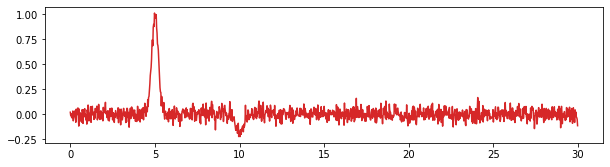

In [25]:
# define the gauss form
gaussfunc=lambda x,sig,mu:np.exp(-1/2*((x-mu)/sig)**2)/sig*np.sqrt(2*np.pi)
sigma  = 0.2
delta  = 0.025
xfactor   = np.arange(-2.5, 2.5, delta)
gauss1 = gaussfunc(xfactor, sigma, 0)
gauss2 = gaussfunc(xfactor, sigma, 0)*(-0.2)
trace_array = np.concatenate((np.zeros(100), gauss1, gauss2, np.zeros(700)), axis=0)
npts = len(trace_array)

trace = Trace(data=trace_array, header={'delta':delta, 'channel':"Synthetic"})
trace.normalize() # convert to obspy.Trace for analyzing data
trace_noise = trace.copy()

mean = 0
standard_dev = 0.05
random_noise = np.random.normal(mean, standard_dev, npts) # add noise
trace_noise.data = trace.data + random_noise # separate trace.data to treat as easy as pie
time=np.arange(npts)*delta
plt.figure(figsize=(10,2.5))
plt.plot(time,trace_noise.data,color='tab:red')
# trace_noise.plot(); # uncomment do see the trace.plot()


In [27]:
# from scipy import fft
def compute_auto(tr):
    delta=tr.stats.delta
    npts=tr.stats.npts
    fft_spectra=np.fft.fftshift(np.fft.fft(tr.data, 2*npts-1))[npts-1:2*npts]
    auto = np.fft.irfft(np.abs(fft_spectra)**2)
    auto_tr=Trace(header={'npts':len(auto),'delta':delta},data=auto)
    # post processing: tapering and filtering
    taper_width = 10/(auto_tr.stats.npts * auto_tr.stats.delta)
    auto_tr.taper(type='cosine', max_percentage=taper_width)
    return auto_tr


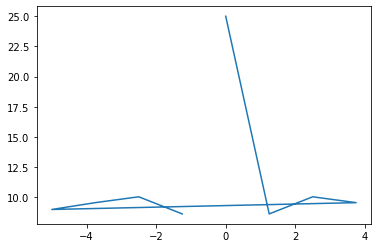

In [34]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq
plt.plot(freq, abs(fourier))